# 6.5. Unsupervised Machine Learning

## This script contains the following:

### 1. Importing libraries and data 
### 2. Preprocessing data
### 3. The elbow technique
### 4. K-means clustering

## 01. Importing libraries and data

In [1]:
# Import libraries and data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Create path
path = r'C:\Users\Quinn\Documents\CF - Data Analysis\Data Immersion\Achieve 6\AirBnB in Europe cities Project'

In [4]:
# Import the dataset
airbnb = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'airbnb_clean.pkl'))

In [5]:
airbnb.shape

(51707, 17)

In [6]:
airbnb.head()

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi_listing,business_listing,cleanliness_rating,guest_satisfaction_overall,bedrooms,city_center_dist,metro_dist,attr_index_norm,rest_index_norm,weekday/weekend,city
0,296.159940,Private room,False,True,2.0,True,0,0,10.0,97.0,1,0.699821,0.193709,25.239380,71.608028,Weekday,Paris
1,288.237487,Private room,False,True,2.0,True,0,0,10.0,97.0,1,2.100005,0.107221,42.507907,58.791463,Weekday,Paris
2,211.343089,Private room,False,True,2.0,False,0,0,10.0,94.0,1,3.302325,0.234724,21.640840,53.051310,Weekday,Paris
3,298.956100,Entire home/apt,False,False,2.0,False,0,1,9.0,91.0,1,0.547567,0.195997,26.391291,70.463506,Weekday,Paris
4,247.926181,Entire home/apt,False,False,4.0,False,0,0,7.0,82.0,1,1.197921,0.103573,19.809165,62.918272,Weekday,Paris


## 02. Preprocessing data

In [7]:
# Drop categories columns 
airbnb = airbnb.drop(columns = ['room_type', 'room_shared','room_private','host_is_superhost','multi_listing','business_listing','weekday/weekend','city'])

In [8]:
airbnb.head()

,price,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,city_center_dist,metro_dist,attr_index_norm,rest_index_norm
0,296.159940,2.0,10.0,97.0,1,0.699821,0.193709,25.239380,71.608028
1,288.237487,2.0,10.0,97.0,1,2.100005,0.107221,42.507907,58.791463
2,211.343089,2.0,10.0,94.0,1,3.302325,0.234724,21.640840,53.051310
3,298.956100,2.0,9.0,91.0,1,0.547567,0.195997,26.391291,70.463506
4,247.926181,4.0,7.0,82.0,1,1.197921,0.103573,19.809165,62.918272


### 3. The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(airbnb).score(airbnb) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.

score

C:\Users\Quinn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Quinn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Quinn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Quinn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Quinn\anaconda3\Lib\site-packages\sklearn\clust

[-5586978444.599338,
 -3068383122.26374,
 -1603578096.544875,
 -1053373564.7736259,
 -729802895.005341,
 -491460769.50845325,
 -355110495.1033568,
 -274548583.9506426,
 -228582599.04712886]

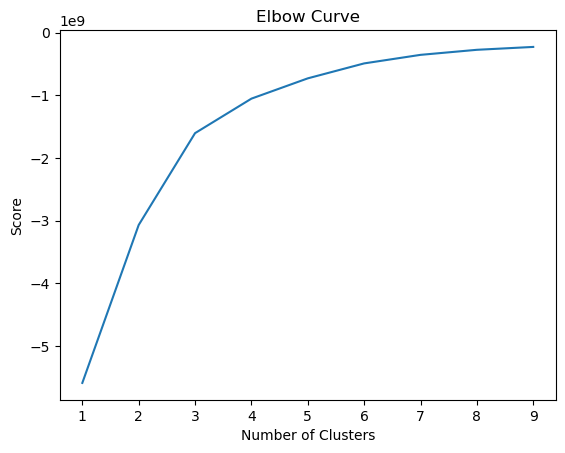

In [11]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### There is a large jump from 2 to 3, after that, the curve starts to straighthen out. This means the optimal count for my cluster is 3

## 04. K-means clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(airbnb)

C:\Users\Quinn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [14]:
airbnb['clusters'] = kmeans.fit_predict(airbnb)

C:\Users\Quinn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
airbnb.head()

,price,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,city_center_dist,metro_dist,attr_index_norm,rest_index_norm,clusters
0,296.159940,2.0,10.0,97.0,1,0.699821,0.193709,25.239380,71.608028,0
1,288.237487,2.0,10.0,97.0,1,2.100005,0.107221,42.507907,58.791463,0
2,211.343089,2.0,10.0,94.0,1,3.302325,0.234724,21.640840,53.051310,0
3,298.956100,2.0,9.0,91.0,1,0.547567,0.195997,26.391291,70.463506,0
4,247.926181,4.0,7.0,82.0,1,1.197921,0.103573,19.809165,62.918272,0


In [16]:
airbnb['clusters'].value_counts(dropna = False)

clusters
0    46429
2     5253
1       25
Name: count, dtype: int64

### Interprete the clusters

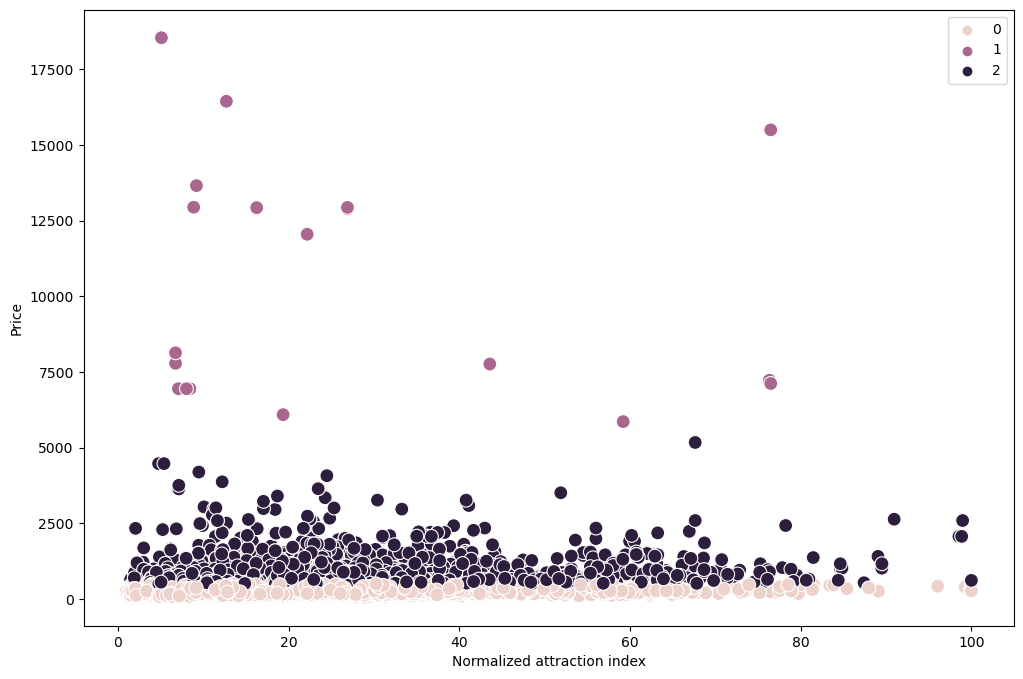

In [17]:
# Plot the clusters for the 'attr_index_norm' and 'price' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=airbnb['attr_index_norm'], y=airbnb['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Normalized attraction index') 
plt.ylabel('Price') 
plt.show()

#### Cluster 0: This cluster is concentrated in the lower left section of the graph, indicating a grouping of listings with lower attraction index and lower prices. The density suggests a common occurrence of these attributes.

#### Cluster 2: Positioned more centrally, this cluster spreads towards the mid and upper sections, signifying a moderate to high attraction index and price range. The spread indicates more variability in the listings within this cluster.

#### Cluster 1: Located at the upper right, this cluster has the fewest listings, all at the high end of both axes. This suggests that listings with a high attraction index also have a high price, but such occurrences are less frequent. One more point is that the maximum value of the attraction index of this cluster is 80, but the average price is still higher than the two other clusters.

#### We still can see a weak positive relationship between price and attraction index.

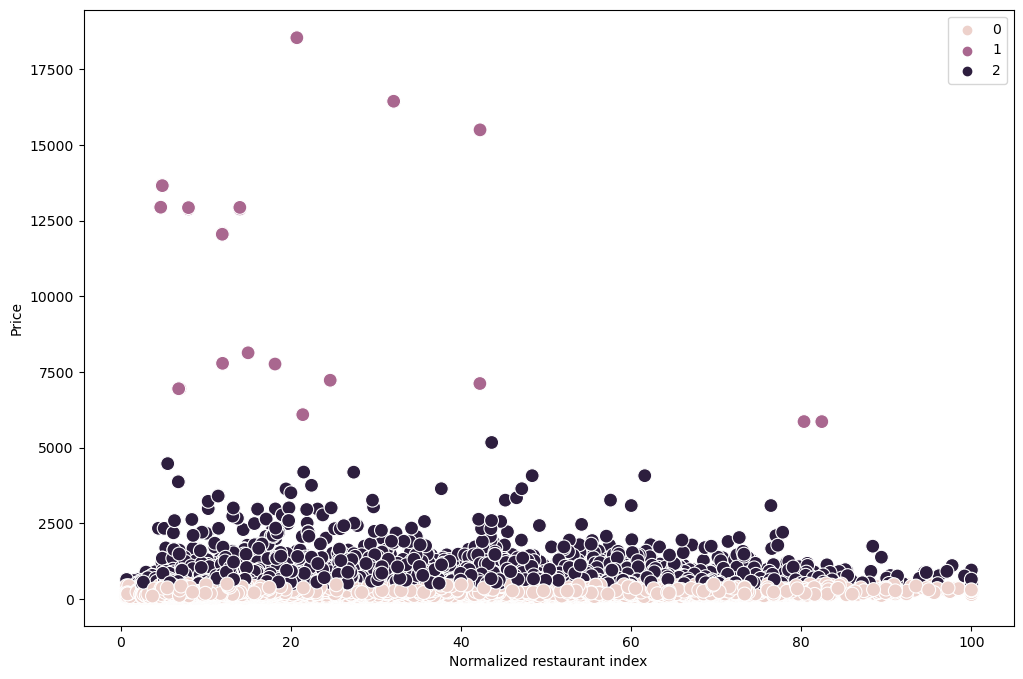

In [18]:
# Plot the clusters for the 'rest_index_norm' and 'price' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=airbnb['rest_index_norm'], y=airbnb['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Normalized restaurant index') 
plt.ylabel('Price') 
plt.show()

#### We have the same distribution as plotting price and normalized attraction index, showing that there is also a weak relationship between price and normalized restaurant index.

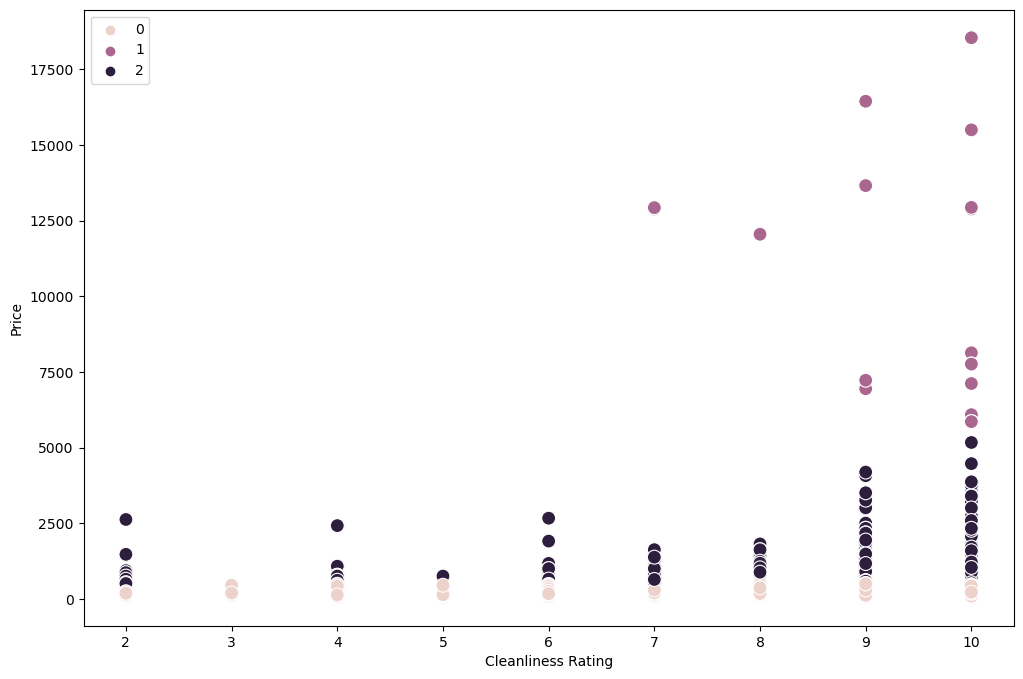

In [19]:
# Plot the clusters for the 'cleanliness_rating' and 'price' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=airbnb['cleanliness_rating'], y=airbnb['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Cleanliness Rating') 
plt.ylabel('Price') 
plt.show()

#### The graphs show a strong positive relationship between cleanliness rating and the prices of listings.
#### The higher the rating, the higher the price. 

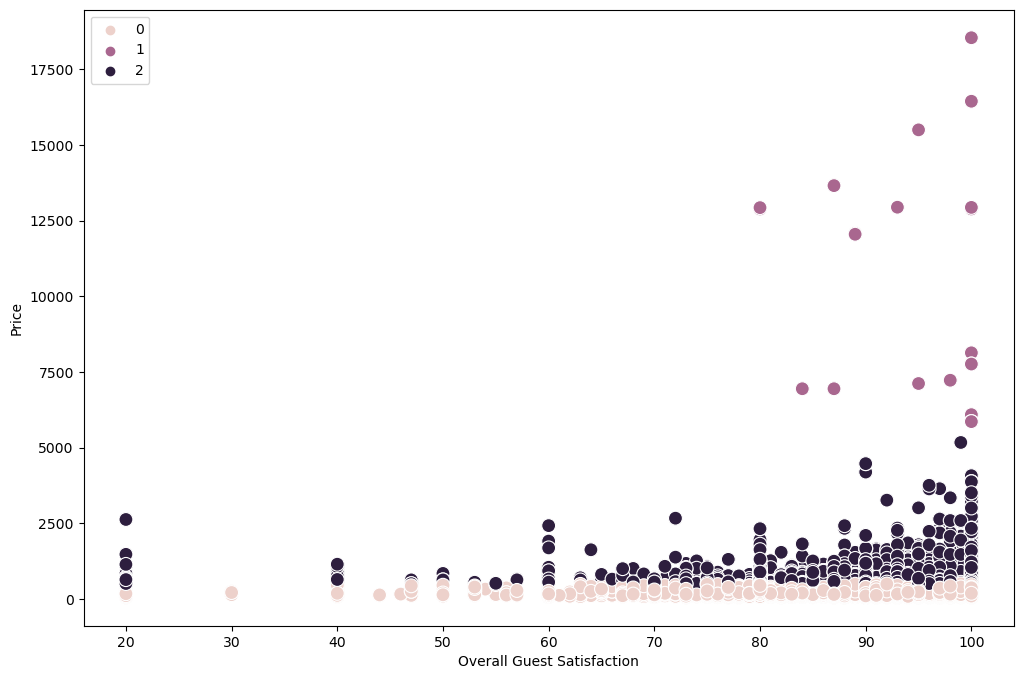

In [20]:
# Plot the clusters for the 'guest_satisfaction_overall' and 'price' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=airbnb['guest_satisfaction_overall'], y=airbnb['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Overall Guest Satisfaction') 
plt.ylabel('Price') 
plt.show()

#### The graphs show a strong positive relationship between guest satisfaction and the prices of listings.
#### The higher the guest rating, the higher the price. 

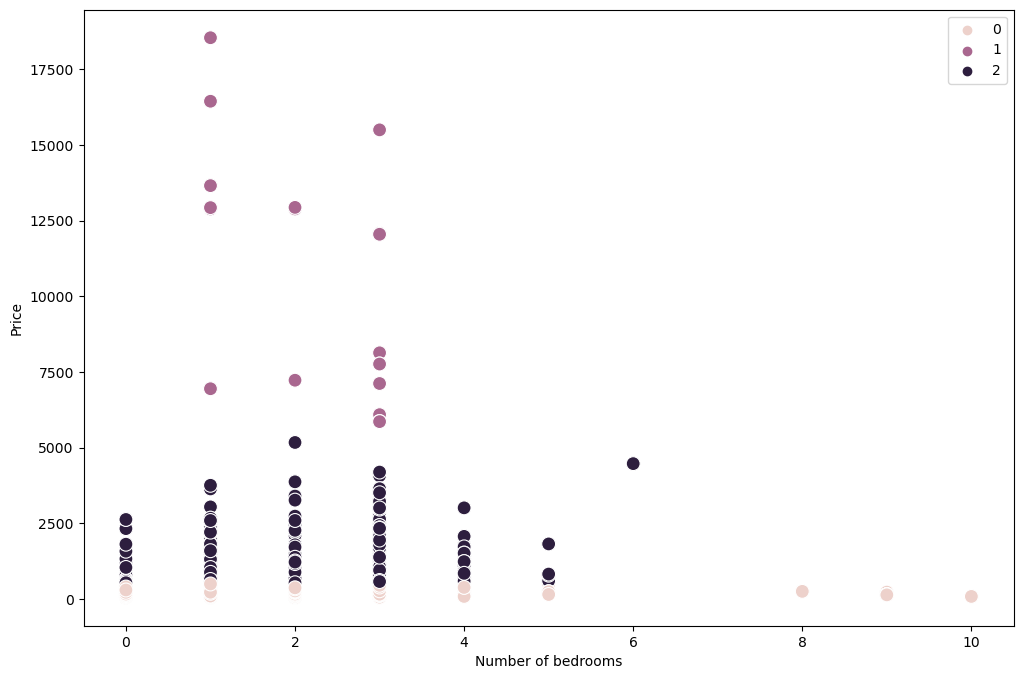

In [21]:
# Plot the clusters for the 'bedrooms' and 'price' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=airbnb['bedrooms'], y=airbnb['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of bedrooms') 
plt.ylabel('Price') 
plt.show()

#### Listings with 1 to 3 bedrooms are the most common listings from the dataset
#### Listings with 8 to 10 have the lowest prices; these listings may be dorms for travelers looking for a lower price.
#### There is a weak positive relationship between the number of bedrooms and prices, but this relationship may be caused by extreme values.

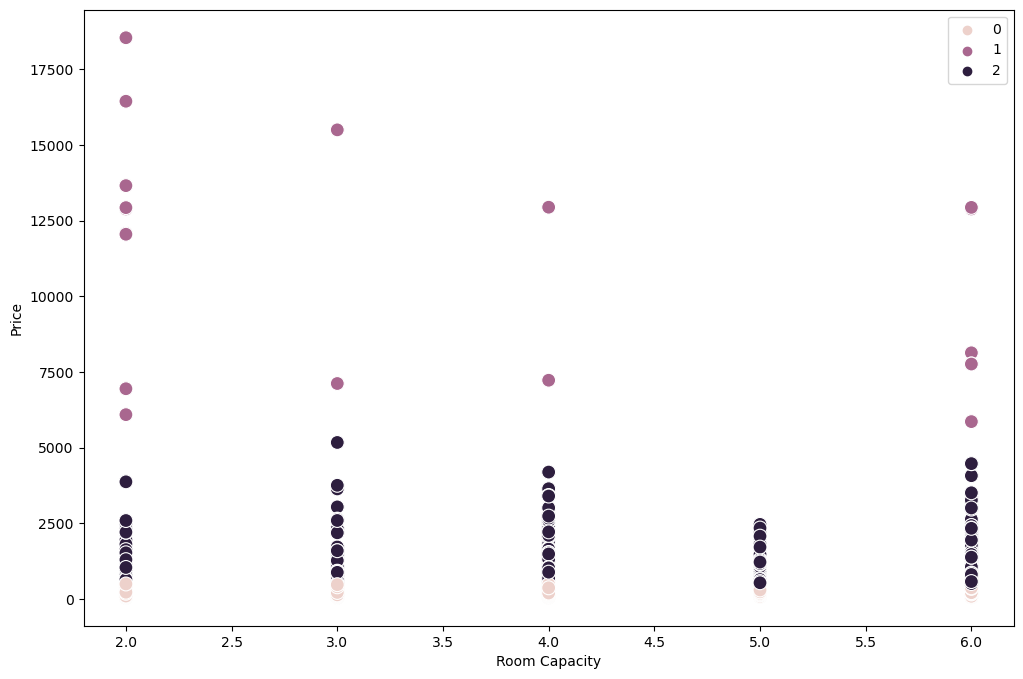

In [22]:
# Plot the clusters for the 'person_capacity' and 'price' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=airbnb['person_capacity'], y=airbnb['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Room Capacity') 
plt.ylabel('Price') 
plt.show()

#### There is no clear strong relationship between room capacity and prices.

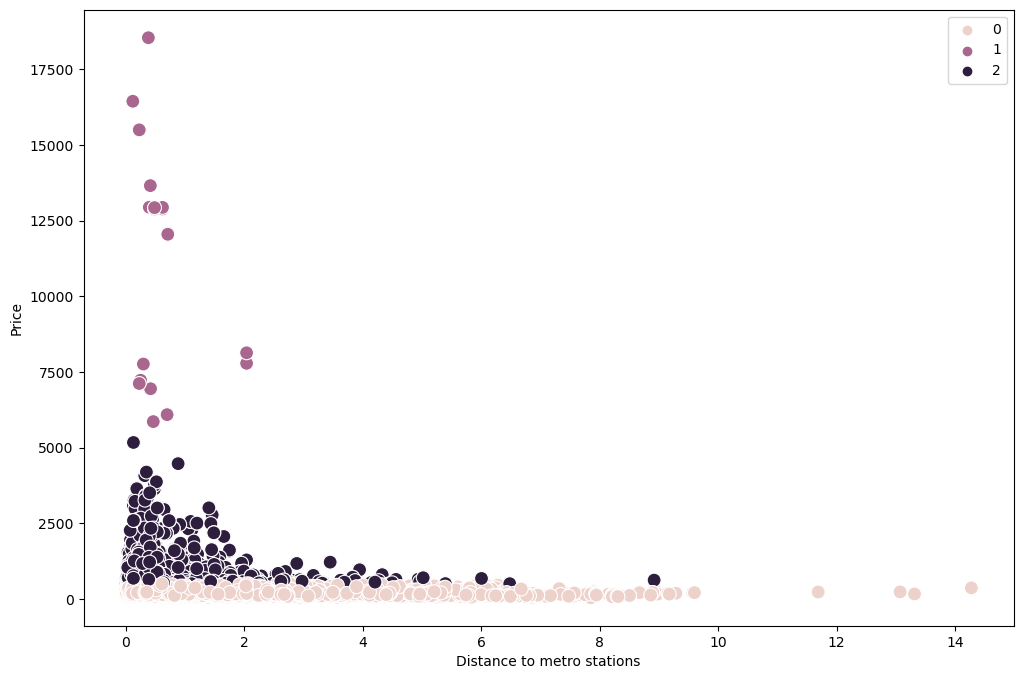

In [23]:
# Plot the clusters for the 'metro_dist' and 'price' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=airbnb['metro_dist'], y=airbnb['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Distance to metro stations') 
plt.ylabel('Price') 
plt.show()

#### Cluster 0: this cluster is also the most populated. It gathers listings at low prices and located at various distances from the metro stations. It also suggests that listings farther from metro stations tend to be cheaper within this cluster.
#### Cluster 2: this cluster includes listings with closer distances from metro stations and higher prices than the first cluster. This cluster also shows a more scattered distribution, with prices across the range and no clear connection to distance from metro stations.
#### Cluster 1 contains the listings closest to metro stations and the highest prices. This cluster is also the least populated, indicating that these listings are less common. There's no clear pattern with distance to metro stations in this cluster either.
#### There is a negative relationship between price and distance to metro stations.

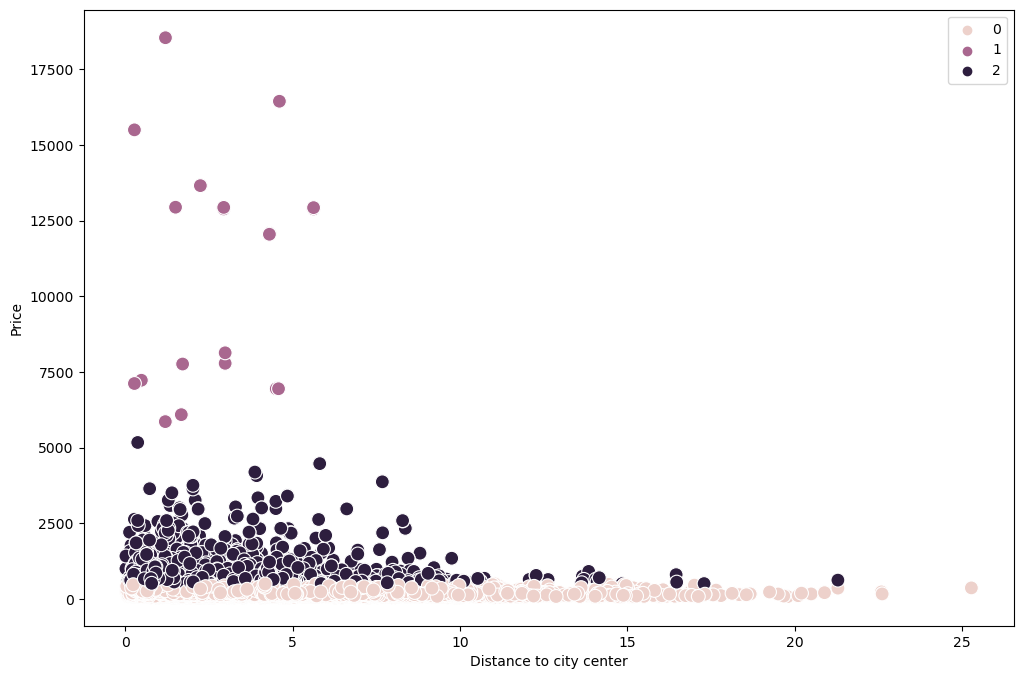

In [24]:
# Plot the clusters for the 'city_center_dist' and 'price' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=airbnb['city_center_dist'], y=airbnb['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Distance to city center') 
plt.ylabel('Price') 
plt.show()

#### We have the same pattern as the graph showing the relationship between distance to metro stations and price.
#### There is a negative relationship between price and distance to metro stations.

### Descriptive statistics for clusters

In [25]:
airbnb.loc[airbnb['clusters'] == 2, 'cluster'] = 'dark purple'
airbnb.loc[airbnb['clusters'] == 1, 'cluster'] = 'purple'
airbnb.loc[airbnb['clusters'] == 0, 'cluster'] = 'pink'

In [26]:
airbnb.groupby('cluster').agg({'person_capacity':['mean', 'median'], 
                         'cleanliness_rating':['mean', 'median'], 
                         'guest_satisfaction_overall':['mean', 'median'],
                        'bedrooms':['mean', 'median'],
                        'city_center_dist':['mean', 'median'],
                        'metro_dist':['mean', 'median'],
                        'attr_index_norm':['mean', 'median'],
                        'rest_index_norm':['mean', 'median'],
                          'price':['mean', 'median']})

person_capacity        cleanliness_rating         \
                       mean median               mean median   
cluster                                                        
dark purple        4.127546    4.0           9.348943   10.0   
pink               3.052187    2.0           9.395464   10.0   
purple             3.520000    2.0           9.160000    9.0   

            guest_satisfaction_overall         bedrooms         \
                                  mean median      mean median   
cluster                                                          
dark purple                   92.26918   96.0  1.646488    2.0   
pink                          92.66844   95.0  1.103125    1.0   
purple                        93.40000   95.0  2.000000    2.0   

            city_center_dist           metro_dist           attr_index_norm  \
                        mean    median       mean    median            mean   
cluster                                                                       
dark purple         2.887476  2.460456   0.527079  0.342423       22.605476   
pink                3.225866  2.627902   0.699081  0.421923       12.377677   
purple              2.804908  2.938307   0.560080  0.418405       26.970882   

                       rest_index_norm                    price               
                median            mean     median          mean       median  
cluster                                                                       
dark purple  20.369554       30.292412  25.189482    775.392519   654.227570  
pink         10.715605       21.938016  17.021168    218.413771   196.385570  
purple       16.250018       20.747328  13.988024  10314.565166  8130.668104

#### Dark Purple Cluster: The mean person capacity is approximately 4.13, indicating that, on average, listings in this cluster can accommodate around 4 people. The median value of 4.0 suggests that this cluster is relatively consistent in terms of capacity.

#### Pink Cluster: Both cleanliness rating and guest satisfaction scores are notably high in the pink cluster, with mean and median values close to 10.0. This suggests that listings in this cluster tend to receive high ratings for cleanliness and overall guest satisfaction.
#### However, the mean and median price values are the lowest compared to other clusters. This proves a negative relationship exists between cleanliness, guest rating, and price.

#### Purple Cluster: The median bedroom count is higher at 2.0, suggesting that listings in this cluster typically offer more bedrooms.

#### Dark Purple and Pink Clusters: These clusters have similar mean and median distances to the city center and metro, indicating that listings in both clusters are located relatively close to these amenities.
#### Purple Cluster: The mean and median distances to the city center and metro are higher, suggesting that listings in this cluster are situated farther away from these amenities on average.

#### Dark Purple and Pink Clusters: Both clusters have similar mean and median values for attraction and restaurant indices, indicating that listings in these clusters are located in areas with comparable access to attractions and restaurants.
#### Purple Cluster: The mean attraction and restaurant indices are lower, suggesting that listings in this cluster may be located in areas with fewer nearby attractions and restaurants.

In [27]:
# Export merged dataframe into csv file
airbnb.to_csv(os.path.join(path, '02 Data','Prepared Data', 'airbnb_cluster.csv'))